In [1]:

import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import os
from scipy.interpolate import CubicSpline
import seaborn as sns
import datetime as dt
import matplotlib.ticker as ticker

sns.set_theme(font_scale=1, style="ticks", palette=None, rc={'figure.dpi': 150})

In [2]:
filepath = '/Users/pietrocaprioglio/Library/CloudStorage/Dropbox/Oxford_PROJECTS/Python_scripts/df_for_ML_cleaned_reduced.csv'

savepath = '/Users/pietrocaprioglio/Library/CloudStorage/Dropbox/Oxford_PROJECTS/Python_scripts/'

In [3]:
df = pd.read_csv(filepath)

In [12]:
df.head()

,Cell_area_measured,Cell_architecture,Cell_flexible,Cell_semitransparent,ETL_stack_sequence,Perovskite_single_crystal,Perovskite_dimension_0D,Perovskite_dimension_2D,Perovskite_dimension_2D3D_mixture,Perovskite_dimension_3D,...,JV_default_PCE,JV_default_Voc_scan_direction,JV_default_Jsc_scan_direction,JV_default_FF_scan_direction,JV_default_PCE_scan_direction,Stabilised_performance_measured,Stability_measured,Stability_light_UV_filter,Stability_temperature_range,Approx_band_gap
0,0.9,nip,False,False,TiO2,False,False,False,False,True,...,1.8,Reversed,Reversed,Reversed,Reversed,False,False,False,nan; nan,1.6
1,0.9,nip,False,False,TiO2,False,False,False,False,True,...,7.6,Reversed,Reversed,Reversed,Reversed,False,False,False,nan; nan,1.6
2,0.9,nip,False,False,TiO2,False,False,False,False,True,...,4.0,Reversed,Reversed,Reversed,Reversed,False,False,False,nan; nan,1.6
3,0.1,nip,False,False,TiO2,False,False,False,False,True,...,6.6,Reversed,Reversed,Reversed,Reversed,False,False,False,nan; nan,1.6
4,0.1,nip,False,False,TiO2,False,False,False,False,True,...,5.9,Reversed,Reversed,Reversed,Reversed,False,False,False,nan; nan,1.6


In [27]:
df = df.drop('JV_default_PCE_scan_direction', axis=1)

In [49]:
for column in df.columns:
    print(f'{column} {len(df[column].unique())}')

Cell_area_measured 250
Cell_architecture 2
Cell_flexible 2
Cell_semitransparent 2
ETL_stack_sequence 7
Perovskite_single_crystal 2
Perovskite_dimension_0D 2
Perovskite_dimension_2D 2
Perovskite_dimension_2D3D_mixture 2
Perovskite_dimension_3D 2
Perovskite_dimension_3D_with_2D_capping_layer 2
Perovskite_dimension_list_of_layers 8
Perovskite_composition_perovskite_ABC3_structure 2
Perovskite_composition_perovskite_inspired_structure 2
Perovskite_composition_short_form 71
Perovskite_composition_inorganic 2
Perovskite_composition_leadfree 2
Perovskite_band_gap_graded 2
Perovskite_deposition_number_of_deposition_steps 6
Perovskite_deposition_procedure 3
Perovskite_deposition_solvents 153
Perovskite_deposition_quenching_induced_crystallisation 2
Perovskite_deposition_thermal_annealing_temperature 403
Perovskite_deposition_thermal_annealing_time 452
Perovskite_deposition_solvent_annealing 2
HTL_stack_sequence 8
Add_lay_front 2
Add_lay_back 2
JV_light_masked_cell 2
JV_default_Voc 694
JV_defaul

In [74]:
# df2.to_csv(savepath + '/df_pero_for_ML2.csv')

In [126]:
df2['Perovskite_deposition_quenching_induced_crystallisation'].unique()

array([False,  True])

In [83]:
df2 = df2.drop('Approx_band_gap', axis=1)

In [84]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15374 entries, 0 to 15373
Data columns (total 31 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Cell_area_measured                                       15374 non-null  float64
 1   Cell_architecture                                        15374 non-null  object 
 2   Cell_flexible                                            15374 non-null  bool   
 3   Cell_semitransparent                                     15374 non-null  bool   
 4   ETL_stack_sequence                                       15374 non-null  object 
 5   Perovskite_single_crystal                                15374 non-null  bool   
 6   Perovskite_dimension_0D                                  15374 non-null  bool   
 7   Perovskite_dimension_2D                                  15374 non-null  bool   
 8   Perovskite_dimension_2D3D_

In [85]:
df_dummies = pd.get_dummies(df2, drop_first=True)

In [86]:
len(df_dummies.columns)

269

In [92]:
# correlation = pd.DataFrame(df_dummies.corr()['JV_default_PCE'][:-1].sort_values()).reset_index()
# sns.barplot(data=correlation, x='index',y='JV_default_PCE')
# plt.xticks(rotation=90);

In [113]:
correlation = pd.DataFrame(df_dummies.corr()['JV_default_PCE'][:-1].sort_values()).reset_index()
correlation2 = correlation.loc[abs(correlation['JV_default_PCE']) > 0.05 ]

In [114]:
correlation2

,index,JV_default_PCE
0,Perovskite_composition_short_form_MAPbI,-0.187070
1,Perovskite_deposition_solvents_DMF,-0.181124
2,HTL_stack_sequence_PEDOT,-0.168600
3,Perovskite_deposition_solvents_GBL,-0.160701
4,Perovskite_deposition_solvents_DMF >> IPA,-0.141427
5,HTL_stack_sequence_P3HT,-0.124944
6,ETL_stack_sequence_ZnOx,-0.113805
7,Cell_semitransparent,-0.107728
8,Perovskite_deposition_number_of_deposition_steps,-0.073157
9,Perovskite_deposition_solvents_DMF; THF,-0.068293


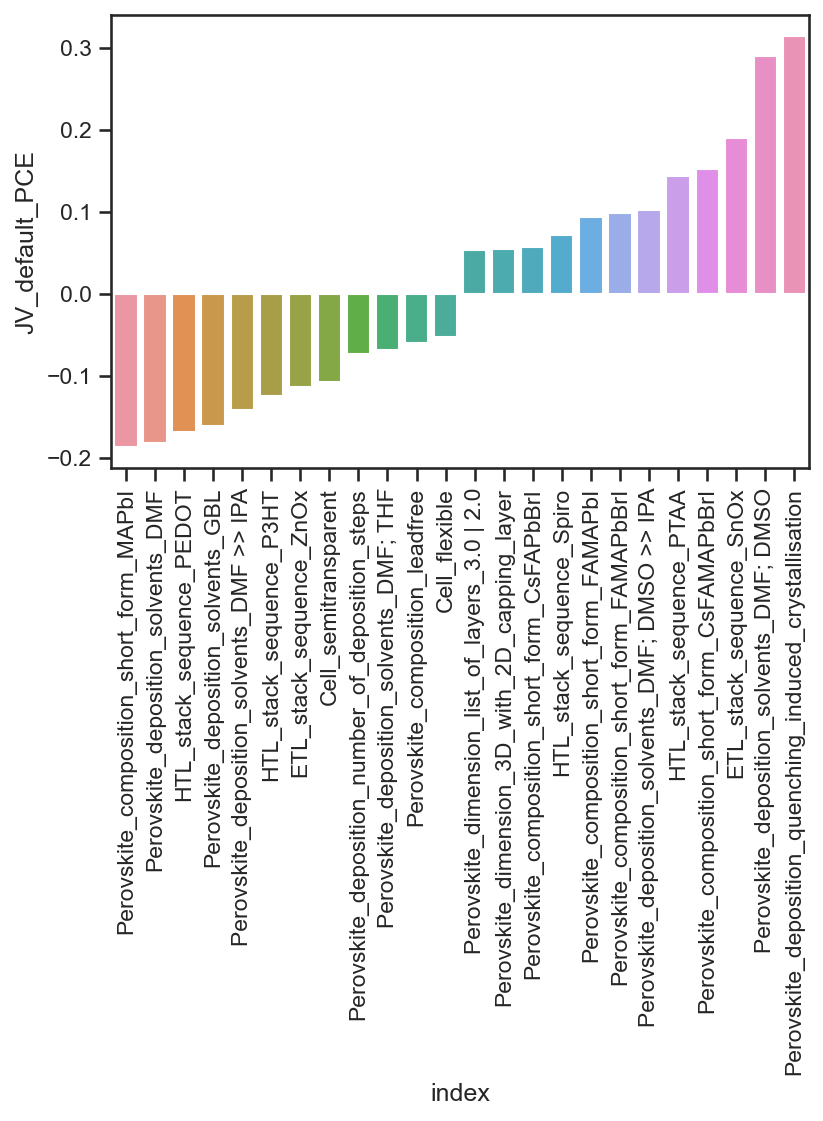

In [125]:
sns.barplot(data=correlation2[:-4_^?], x='index',y='JV_default_PCE')
plt.xticks(rotation=90);

In [121]:
correlation_Voc = pd.DataFrame(df_dummies.corr()['JV_default_Voc'][:-1].sort_values()).reset_index()
correlation_Voc2 = correlation_Voc.loc[abs(correlation_Voc['JV_default_Voc']) > 0.05 ]

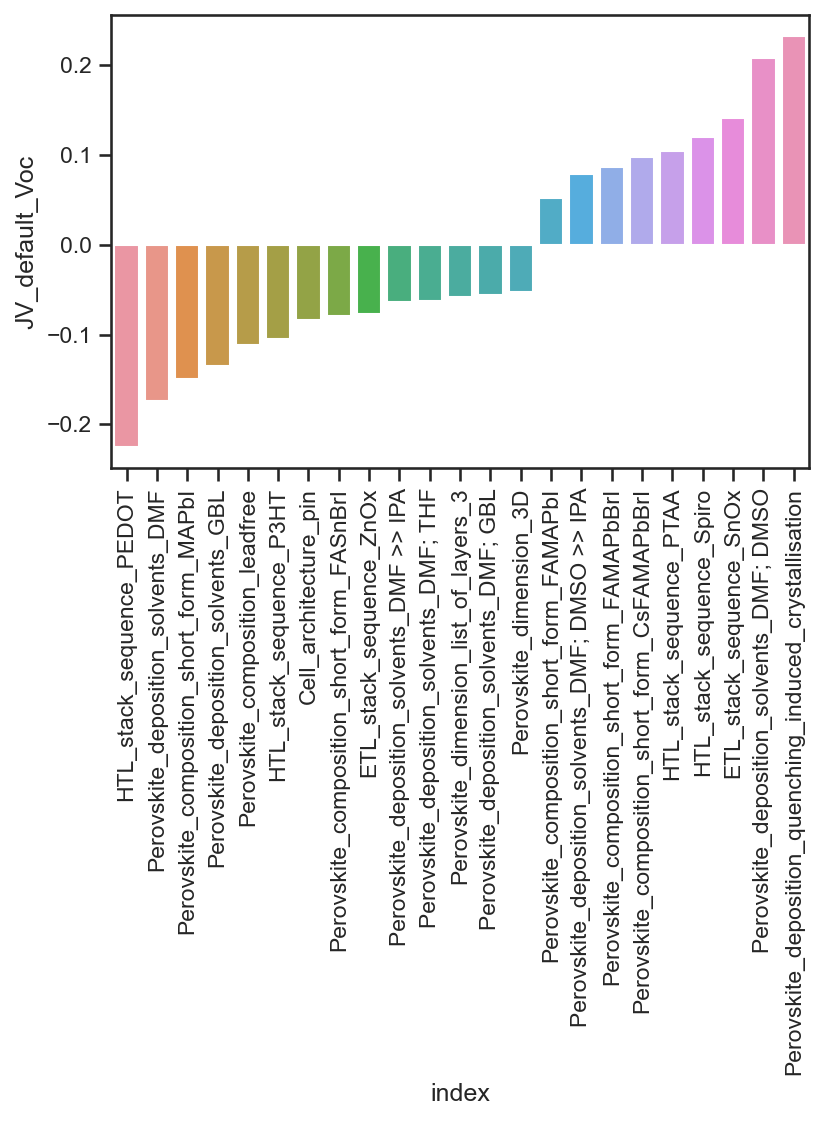

In [124]:
sns.barplot(data=correlation_Voc2[:-4], x='index',y='JV_default_Voc')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='JV_default_PCE', ylabel='Density'>

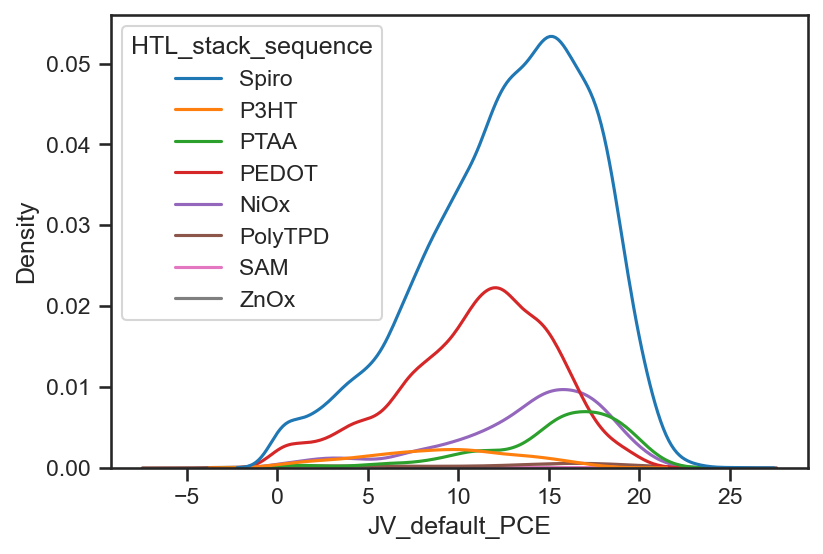

In [104]:
sns.kdeplot(data=df2, x=df2['JV_default_PCE'], hue='HTL_stack_sequence')

In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

In [131]:
X = df_dummies.loc[:, ~df_dummies.columns.str.contains("default")]

In [77]:
y = df_dummies['JV_default_PCE']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [133]:
X_train_scaled = scaler.fit_transform(X_train)

In [134]:
X_test_scaled = scaler.transform(X_test)

In [146]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(max_depth=5)

In [147]:
tree_model.fit(X_train_scaled,y_train)

DecisionTreeRegressor(max_depth=5)

In [155]:
feature_import = pd.DataFrame()
feature_import['feature'] = pd.DataFrame(X.columns)
feature_import['importance'] = pd.DataFrame(tree_model.feature_importances_)
feature_import = feature_import.loc[feature_import['importance']>0.02].sort_values('importance')

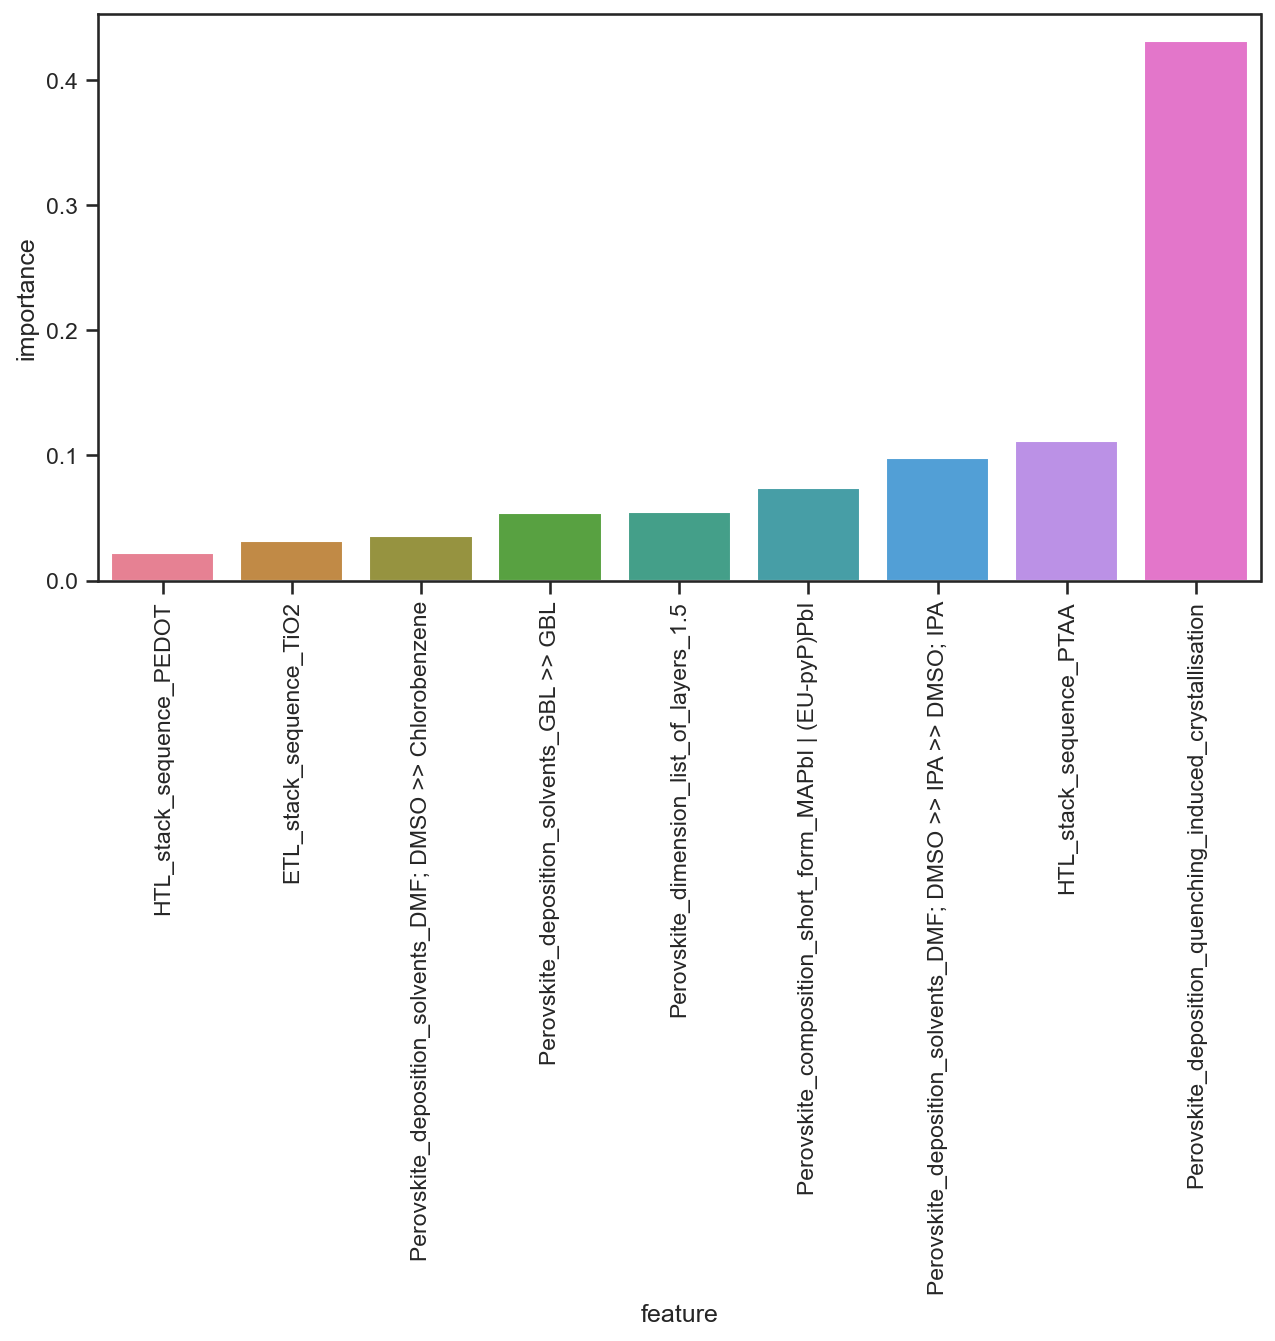

In [156]:
fig = plt.figure(figsize=(10, 5), dpi=150)
sns.barplot(data=feature_import, x=feature_import['feature'], y=feature_import['importance'], palette='husl',)
# plt.xticks(rotation=90);

In [157]:
from sklearn.tree import plot_tree

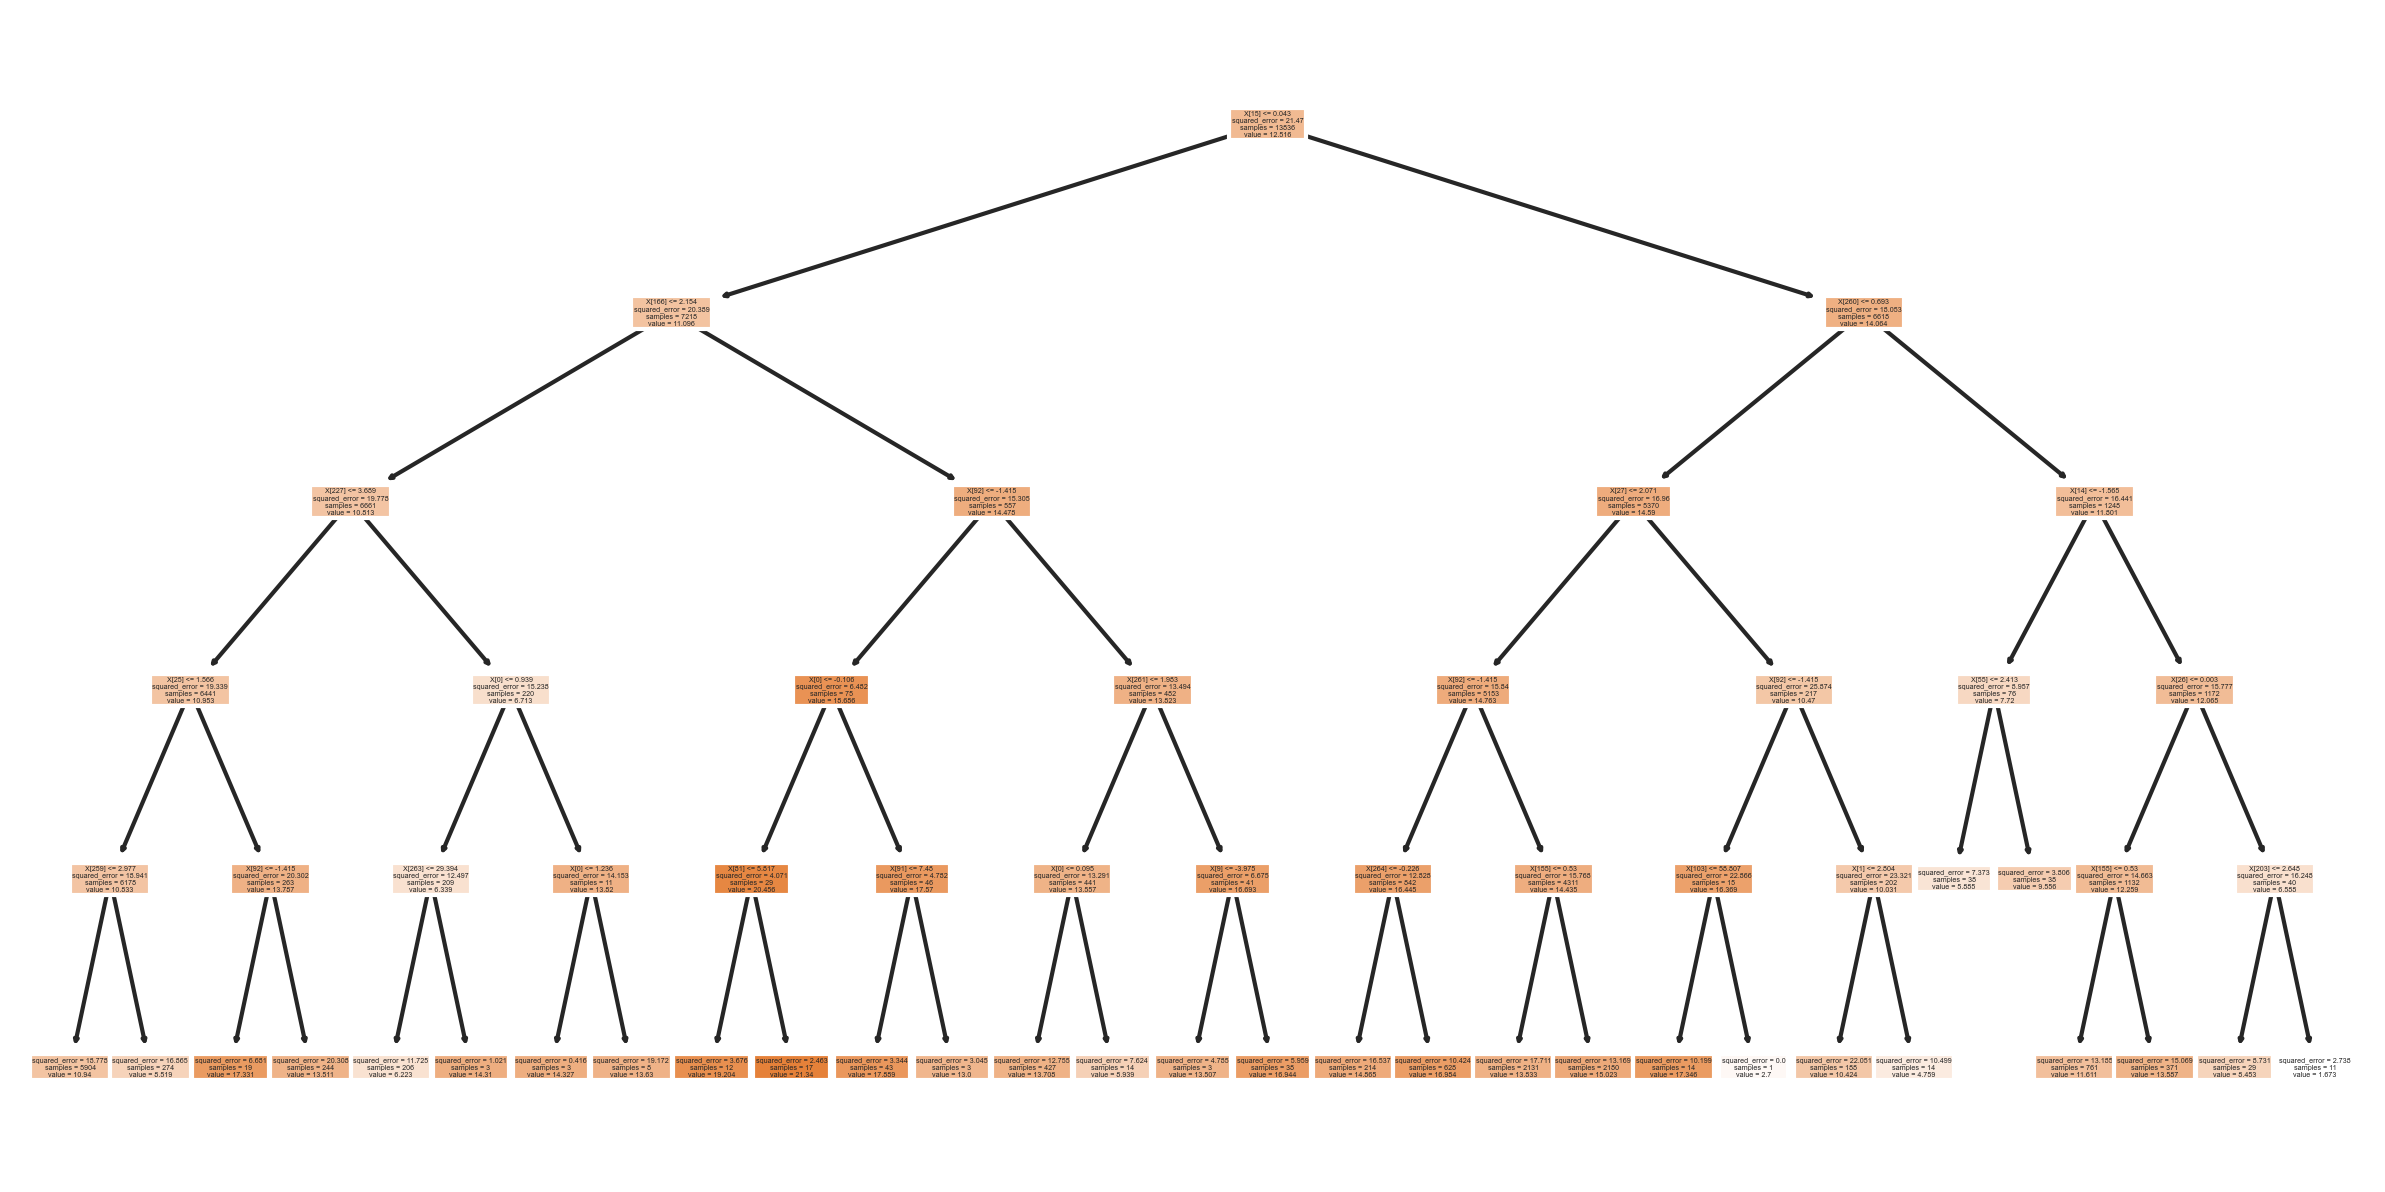

In [168]:
fig = plt.figure(figsize=(10, 5), dpi=300)

plot_tree(tree_model, filled=True)
plt.show()

In [161]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [163]:
test_predictions = tree_model.predict(X_test_scaled)

In [164]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [165]:
RMSE

4.170060869358391

In [167]:
MAE

3.2889588000946604

In [169]:
from sklearn.ensemble import RandomForestRegressor

In [177]:
random_forest = RandomForestRegressor(max_depth=6)


In [178]:
random_forest.fit(X_train_scaled,y_train)

RandomForestRegressor(max_depth=6)

In [179]:
test_predictions_rand = random_forest.predict(X_test_scaled)

In [180]:
MAE_rand = mean_absolute_error(y_test,test_predictions_rand)
MSE_rand = mean_squared_error(y_test,test_predictions_rand)
RMSE_rand = np.sqrt(MSE)

In [218]:
random_forest.fit(X,y)

RandomForestRegressor(max_depth=6)

In [219]:
y_prediction_final = random_forest.predict(X)

In [181]:
RMSE_rand

4.170060869358391

In [182]:
MAE_rand

3.1686843562607896

In [183]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [196]:
model.fit(X_train,y_train)

LinearRegression()

In [197]:
linear_predict = model.predict(X_test)

In [198]:
MAE_linear = mean_absolute_error(y_test,linear_predict)
MSE_linear = mean_squared_error(y_test,linear_predict)
RMSE_linear = np.sqrt(MSE_linear)

In [199]:
RMSE_linear

1325679357839.3264

In [200]:
MAE_linear

69764039958.52814

<Figure size 3750x5250 with 0 Axes>

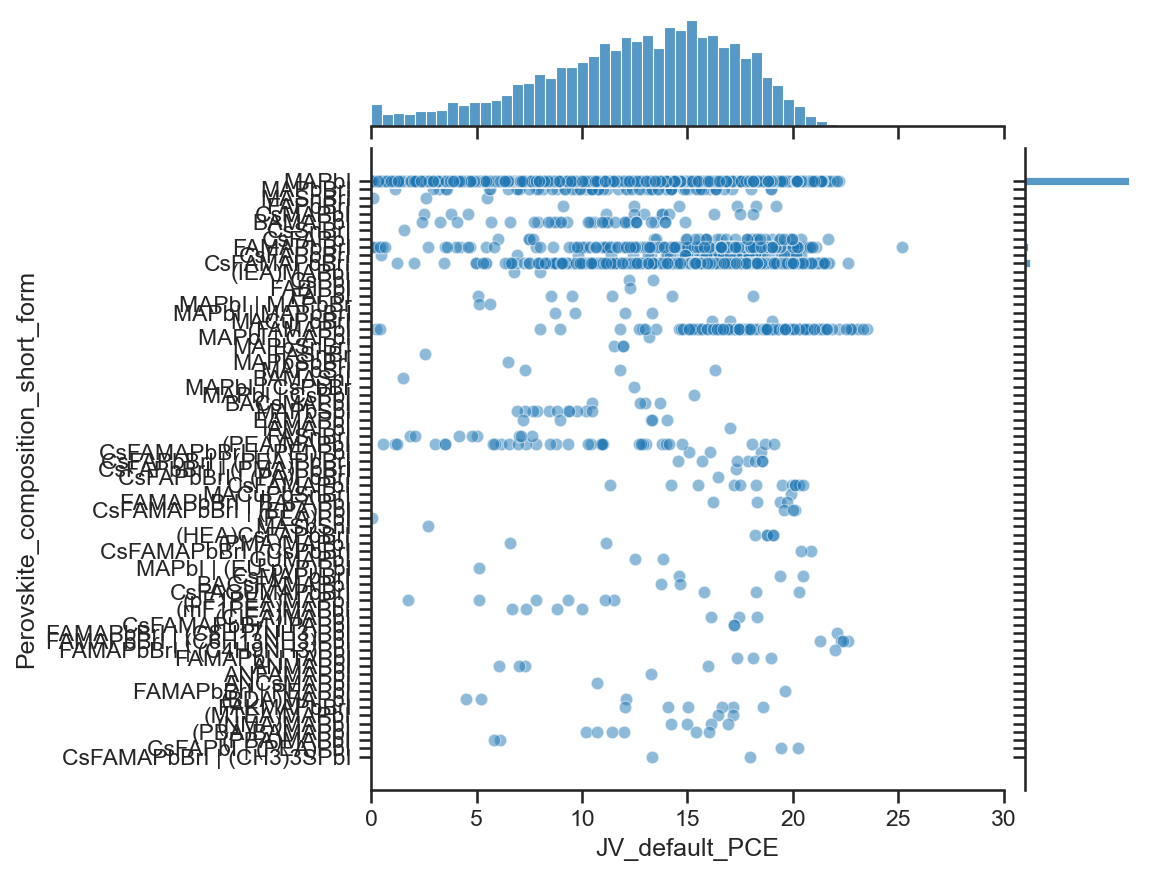

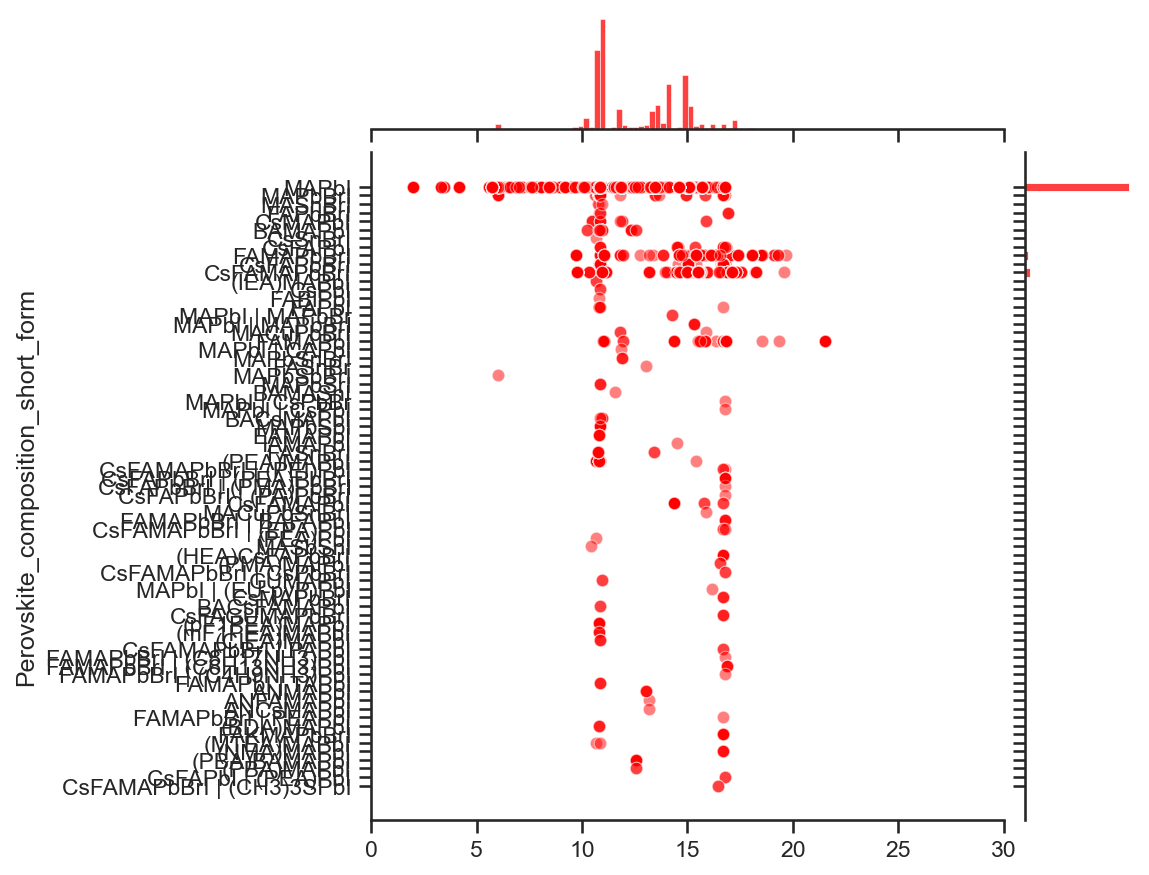

In [230]:
fig = plt.figure(figsize=(25, 35))
fig.patch.set_facecolor('white')

plot = sns.jointplot(data=df2, y='Perovskite_composition_short_form', x='JV_default_PCE', 
                     palette='husl',legend='full',
                     alpha=0.5,  xlim=(0, 30))

plot = sns.jointplot( y=df2['Perovskite_composition_short_form'], x=y_prediction_final, 
                     palette='husl',legend='full',color='red',
                     alpha=0.5,  xlim=(0, 30))
# plt.ylim(0,1)

In [204]:
df2.columns

Index(['Cell_area_measured', 'Cell_architecture', 'Cell_flexible',
       'Cell_semitransparent', 'ETL_stack_sequence',
       'Perovskite_single_crystal', 'Perovskite_dimension_0D',
       'Perovskite_dimension_2D', 'Perovskite_dimension_2D3D_mixture',
       'Perovskite_dimension_3D',
       'Perovskite_dimension_3D_with_2D_capping_layer',
       'Perovskite_dimension_list_of_layers',
       'Perovskite_composition_perovskite_ABC3_structure',
       'Perovskite_composition_perovskite_inspired_structure',
       'Perovskite_composition_short_form', 'Perovskite_composition_inorganic',
       'Perovskite_composition_leadfree', 'Perovskite_band_gap_graded',
       'Perovskite_deposition_number_of_deposition_steps',
       'Perovskite_deposition_procedure', 'Perovskite_deposition_solvents',
       'Perovskite_deposition_quenching_induced_crystallisation',
       'Perovskite_deposition_solvent_annealing', 'HTL_stack_sequence',
       'Add_lay_front', 'Add_lay_back', 'JV_light_masked_cell',

In [224]:
len(df2['Cell_area_measured'])

15374

In [225]:
len(y_prediction_final)

15374